In [1]:
def f(x):
    return x**2

In [2]:
f(8)

64

In [3]:
import kwant
import matplotlib.pyplot as pyplot
%matplotlib inline
import scipy.sparse.linalg as sla
import numpy as np

In [13]:
sys = kwant.Builder() #create the system, but it's empty

In [14]:
a = 0.25 #distance between the sites (lattice constant)
lat = kwant.lattice.square(a) #defines the lattice

In [15]:
W = 2 #width of the system
L = 10 #length of the system

In [16]:
mu = 0. #chemical potential
t = 1. #hopping

In [17]:
for i in range(L):#itteration over the size of the system (0--L-1)
    for j in range(W):
        sys[lat(i, j)] = mu #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*mu$)
        if i>0:
            sys[(lat(i-1, j), lat(i, j))] = t #adding hopping ($a_{i-1,j}^\dag a_{i,j}*t$)
        if j>0:
            sys[(lat(i, j-1), lat(i, j))] = t #adding hopping ($a_{i,j-1}^\dag a_{i,j}*t$)

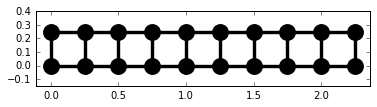

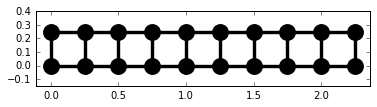

In [18]:
kwant.plot(sys.finalized())#plots finalized system

In [26]:
def energy(delta, mu, W, L):
    sys = kwant.Builder()
    a = 1
    lat = kwant.lattice.square(a)
    for i in range(L):
        for j in range(W):
            sys[lat(i, j)] = mu
            if i>0:
                sys[(lat(i-1, j), lat(i, j))] = delta
            if j>0:
                sys[(lat(i, j-1), lat(i, j))] = delta
    ham_mat = sys.finalized().hamiltonian_submatrix(sparse=True)
    ev = sla.eigsh(ham_mat, k=5, which='SA', return_eigenvectors=False)
    return ev

In [27]:
np.sort(energy(1, 0.1, 1, 10)) 

array([-1.81898595, -1.58250707, -1.20972147, -0.73083003, -0.18462968])

In [28]:
def plot_energies(trange, mu, W, L):

    energies = []
    
    for delta in trange:
        
        energies.append(np.sort(energy(delta, mu, W, L)))

    pyplot.figure()
    pyplot.plot(trange, energies)
    pyplot.show()


In [29]:
trange = np.linspace(0.1, 2.0, 100)
plot_energies(trange, 0.1, 1, 100)#array of delta's, mu, W, L

In [2]:
sys = kwant.Builder() #create the system, but it's empty
a = 0.25 #distance between the sites (lattice constant)
lat = kwant.lattice.square(a) #defines the lattice
W = 2 #width of the system
L = 10 #length of the system

NameError: name 'kwant' is not defined

In [7]:
#CASE 1: mu=0,t!=0
mu = 0. #chemical potential
delta = 1. #delta
t = 1. #hopping

In [8]:
for i in range(L):#itteration over the size of the system (0--L-1)
    for j in range(W):
        if j==0:
            sys[lat(i, j)] = mu #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*mu$) 
        elif j==1:
            sys[lat(i, j)] = -mu #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*mu$) 
        if j>0 and i>0:
            sys[(lat(i-1, j-1), lat(i, j))] = delta #adding hopping ($a_{i-1,j-1}^\dag a_{i,j}*t$)
            sys[(lat(i-1, j), lat(i, j-1))] = -delta #adding hopping ($a_{i-1,j}^\dag a_{i,j-1}*t$)

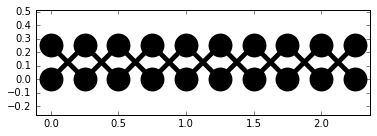

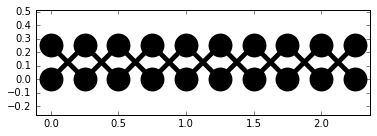

In [9]:
kwant.plot(sys.finalized())#plots finalized system

In [44]:
def energy(delta, t, mu, W, L):
    sys = kwant.Builder()
    a = 1
    lat = kwant.lattice.square(a)
    for i in range(L):#itteration over the size of the system (0--L-1)
        for j in range(W):
            if j==0:
                sys[lat(i, j)] = mu #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*mu$) 
            elif j==1:
                sys[lat(i, j)] = -mu #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*mu$) 
            if i>0:
                sys[(lat(i-1, j), lat(i, j))] = t #horizontal hopping ($a_{i-1,j}^\dag a_{i,j}*t$)
                if j>0:
                    sys[(lat(i-1, j-1), lat(i, j))] = delta # superconducting gap ($a_{i-1,j-1}^\dag a_{i,j}*t$)
                    sys[(lat(i-1, j), lat(i, j-1))] = -delta # superconducting gap ($a_{i-1,j}^\dag a_{i,j-1}*t$)
                    sys[(lat(i-1, j), lat(i, j))] = -t #horizontal hopping ($a_{i-1,j}^\dag a_{i,j}*t$)
                
    ham_mat = sys.finalized().hamiltonian_submatrix(sparse=True)
    ev = sla.eigsh(ham_mat, k=8, which='SM', return_eigenvectors=True, maxiter=100000)
    return ev

In [45]:
np.sort(energy(0, 0.01, 1.0, 2, 10)) # 

array([-0.9916917 , -0.98690279, -0.98317493, -0.98081014,  0.98081014,
        0.98317493,  0.98690279,  0.9916917 ])

In [46]:
def plot_energies(trange, mu, delta, W, L):

    energies = []
    
    for t in trange:
        
        energies.append(np.sort(energy(delta, t, mu, W, L)))

    pyplot.figure()
    pyplot.plot(trange, energies)
    pyplot.show()


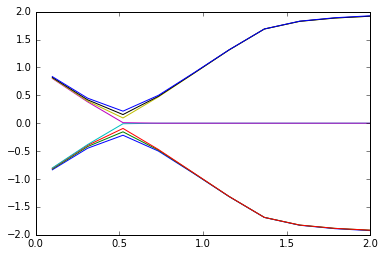

In [48]:
trange = np.linspace(0.1, 2.0, 10)
plot_energies(trange, 1., 1.0, 2, 100)#array of t's, mu, W, L